# The data you need to report on DOGE
Nicar 2025, March 7, 2025

**What this session will cover:** 
1. How to access and read government spending records
2. How to access, use and check DOGE’s wall of receipts
3. How to compare DOGE’s receipts with government spending records

**Key terms:**
* Appropriated funds - Congress has passed a law determining a discrete amount of money to be used for a specific goal.
* Obligation/obligated funds - Money a federal agency has legally committed to spend. Not everything is spent at once! 
* Outlay/disbursement - Funds drawn down from recipient. Reflects money the government has actually paid out. 
* Two types of government spending:
    * Financial assistance - Generally, grants and loans. Term sound familiar? This is what OMB ordered a temporary pause on in late January. 
    * Contracts - Procurement for a good or service typically used by the government.

Where to go to find government spending information? [USA Spending](https://www.usaspending.gov/).

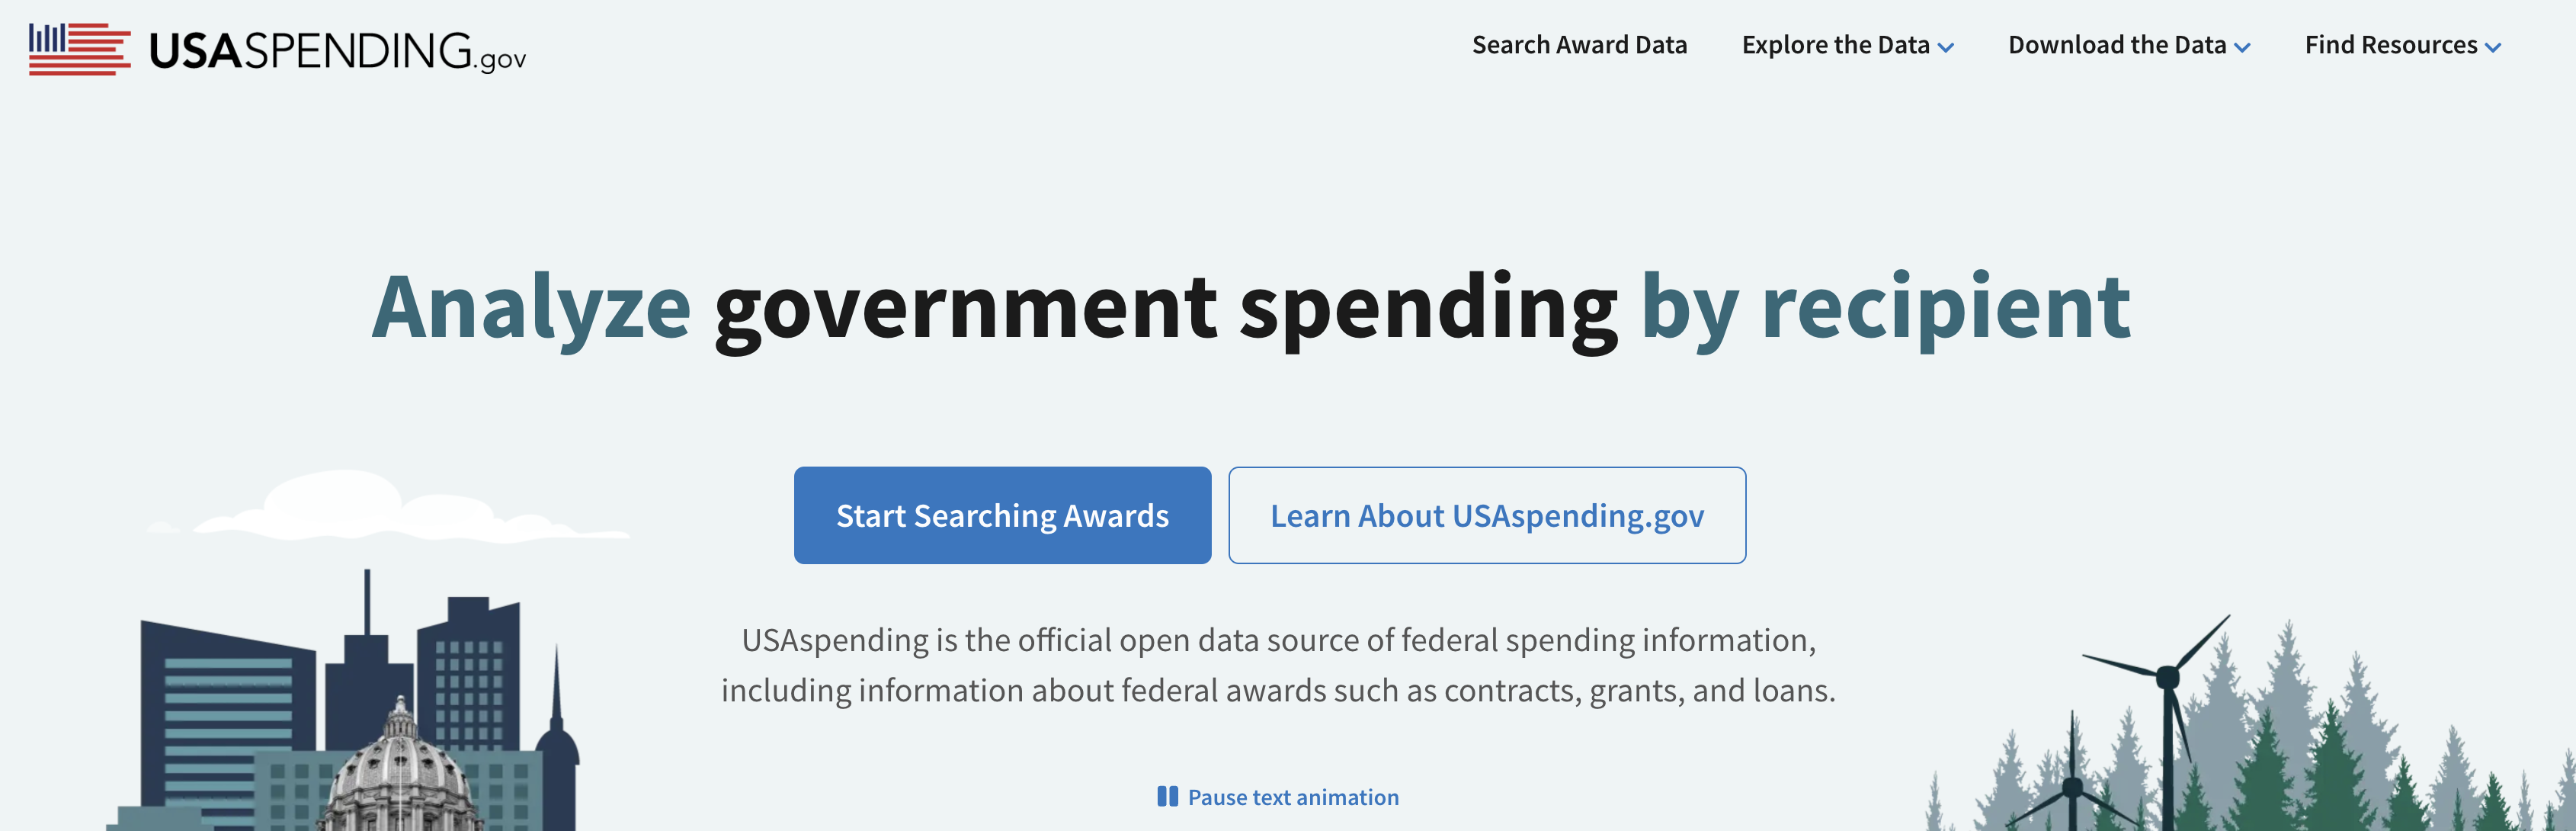

🗺️ **Side quests:**
* Transaction data
* Sub-award data

### STEP 1:  Let's look briefly at USA Spending outputs for each spending type: 

In [8]:
import pandas as pd
import numpy as np
import humanize
pd.set_option('display.max_columns',None)

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

assistance = pd.read_csv('../data/PrimeAwardSummariesAndSubawards_2025-01-21_H15M17S35664670_IIJA/Assistance_PrimeAwardSummaries_2025-01-21_H15M20S19_1.csv')
contracts = pd.read_csv('../data/PrimeAwardSummariesAndSubawards_2025-01-21_H15M17S35664670_IIJA/Contracts_PrimeAwardSummaries_2025-01-21_H15M18S00_1.csv')

In [9]:
#We have a lot of columns to work with!
print(assistance.shape)
print(contracts.shape)

(219581, 100)
(13195, 286)


**Key financial assistance columns:**

🛑 NOTE: Reporting for outlays has only been required since 2022. If you're looking at older data, you outlays are not comprehensive. 

* `award_id_piid` - CONTRACT ONLY, Procurement Instrument Identifier, meant to be unique, but is not always unique in practice.
* `award_id_fain` - ASSISTANCE ONLY, Federal Award Identification Number, unique ID for assistance awards. 
* `outlayed` or `obligated_amount_from_IIJA_supplemental` - outlays/obligations from IIJA
* `outlayed` or `obligated_amount_from_COVID-19_supplementals` - outlays/obligations from Covid stimulus. Which specific law varies based on how you download the data.
* `total_outalyed_amount` or `total_obligated_amount` - total federal outlays and obligations for an award
* `total_funding_amount` - includes federal obligations and state/local, where applicable
* `awarding_agency_name` or `awarding_sub_agency_name` - Federal agency and sub agency that issued award. Can sometime differ from _funding_ agency
* `recipient_name`
* Place of performance vs recipient location columns - Place of performance refers to the location where the majority of work is performed. Recipient location refers to the address of the recipient. These are not always the same.
* `cfda_numbers_and_titles` - ASSISTANCE ONLY, CFDA codes or Assistance Listing codes. Catalog of federal spending programs. Can be broad.
* `usaspending_permalink` - There for you in case you want to look up an award on the site itself.

**VIP columns for us today**: 
* `award_id_piid` 
* `total_outalyed_amount`
* `total_obligated_amount`

🗺️ Side quests: 
* Tracking loans specifically in spending data
* Tracking spending by law
* Award vs account data

In [10]:
assistance.head(3)

,assistance_award_unique_key,award_id_fain,award_id_uri,sai_number,disaster_emergency_fund_codes,outlayed_amount_from_COVID-19_supplementals,obligated_amount_from_COVID-19_supplementals,outlayed_amount_from_IIJA_supplemental,obligated_amount_from_IIJA_supplemental,award_latest_action_date,award_latest_action_date_fiscal_year,total_obligated_amount,total_outlayed_amount,indirect_cost_federal_share_amount,total_non_federal_funding_amount,total_funding_amount,total_face_value_of_loan,total_loan_subsidy_cost,award_base_action_date,award_base_action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,funding_agency_code,funding_agency_name,funding_sub_agency_code,funding_sub_agency_name,funding_office_code,funding_office_name,treasury_accounts_funding_this_award,federal_accounts_funding_this_award,object_classes_funding_this_award,program_activities_funding_this_award,recipient_uei,recipient_duns,recipient_name,recipient_name_raw,recipient_parent_uei,recipient_parent_duns,recipient_parent_name,recipient_country_code,recipient_country_name,recipient_address_line_1,recipient_address_line_2,recipient_city_code,recipient_city_name,prime_award_summary_recipient_county_fips_code,recipient_county_name,prime_award_summary_recipient_state_fips_code,recipient_state_code,recipient_state_name,recipient_zip_code,recipient_zip_last_4_code,prime_award_summary_recipient_cd_original,prime_award_summary_recipient_cd_current,recipient_foreign_city_name,recipient_foreign_province_name,recipient_foreign_postal_code,primary_place_of_performance_scope,primary_place_of_performance_country_code,primary_place_of_performance_country_name,primary_place_of_performance_code,primary_place_of_performance_city_name,prime_award_summary_place_of_performance_county_fips_code,primary_place_of_performance_county_name,prime_award_summary_place_of_performance_state_fips_code,primary_place_of_performance_state_name,primary_place_of_performance_zip_4,prime_award_summary_place_of_performance_cd_original,prime_award_summary_place_of_performance_cd_current,primary_place_of_performance_foreign_location,cfda_numbers_and_titles,funding_opportunity_number,funding_opportunity_goals_text,assistance_type_code,assistance_type_description,prime_award_base_transaction_description,business_funds_indicator_code,business_funds_indicator_description,business_types_code,business_types_description,record_type_code,record_type_description,highly_compensated_officer_1_name,highly_compensated_officer_1_amount,highly_compensated_officer_2_name,highly_compensated_officer_2_amount,highly_compensated_officer_3_name,highly_compensated_officer_3_amount,highly_compensated_officer_4_name,highly_compensated_officer_4_amount,highly_compensated_officer_5_name,highly_compensated_officer_5_amount,usaspending_permalink,last_modified_date
0,ASST_NON_ACOACP200000158836035072022_2700,ACOACP200000158836035072022,ACOACP2000001588360350720221120220824PJDLF8VZNF99,NaN,Z: Emergency P.L. 117-58,NaN,NaN,8080.0,8080.0,2022-08-24,2022,8080.0,8080.0,NaN,NaN,8080.0,0.0,0.0,2022-08-24,2022,NaN,NaN,27,Federal Communications Commission,2700,Federal Communications Commission,273FCC,FCC,27.0,Federal Communications Commission,2700,Federal Communications Commission,273FCC,FCC,027-X-1911-000,027-1911,"41.0: Grants, subsidies, and contributions",0001: EMERGENCY BROADBAND BENEFIT PROGRAM,PJDLF8VZNF99,NaN,U.S. INTERNET CORP,U. S. INTERNET CORP.,PJDLF8VZNF99,NaN,U.S. INTERNET CORP,USA,UNITED STATES,12450 WAYZATA BLVD STE 315,NaN,30140,HOPKINS,27053.0,HENNEPIN,27.0,MN,MINNESOTA,55305.0,1907.0,MN-03,MN-03,NaN,NaN,NaN,STATE-WIDE,USA,UNITED STATES,MN*****,NaN,NaN,NaN,27.0,MINNESOTA,NaN,MN-90,NaN,NaN,32.008: AFFORDABLE CONNECTIVITY PROGRAM,NaN,NaN,6,"DIRECT PAYMENT FOR SPECIFIED USE, AS A SUBSIDY...",THE AFFORDABLE CONNECTIVITY PROGRAM IS AN FCC ...,NON,NOT RECOVERY ACT,

In [11]:
contracts.head(3)

,contract_award_unique_key,award_id_piid,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,disaster_emergency_fund_codes,outlayed_amount_from_COVID-19_supplementals,obligated_amount_from_COVID-19_supplementals,outlayed_amount_from_IIJA_supplemental,obligated_amount_from_IIJA_supplemental,total_obligated_amount,total_outlayed_amount,current_total_value_of_award,potential_total_value_of_award,award_base_action_date,award_base_action_date_fiscal_year,award_latest_action_date,award_latest_action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,period_of_performance_potential_end_date,ordering_period_end_date,solicitation_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,funding_agency_code,funding_agency_name,funding_sub_agency_code,funding_sub_agency_name,funding_office_code,funding_office_name,treasury_accounts_funding_this_award,federal_accounts_funding_this_award,object_classes_funding_this_award,program_activities_funding_this_award,foreign_funding,foreign_funding_description,sam_exception,sam_exception_description,recipient_uei,recipient_duns,recipient_name,recipient_name_raw,recipient_doing_business_as_name,cage_code,recipient_parent_uei,recipient_parent_duns,recipient_parent_name,recipient_parent_name_raw,recipient_country_code,recipient_country_name,recipient_address_line_1,recipient_address_line_2,recipient_city_name,prime_award_summary_recipient_county_fips_code,recipient_county_name,prime_award_summary_recipient_state_fips_code,recipient_state_code,recipient_state_name,recipient_zip_4_code,prime_award_summary_recipient_cd_original,prime_award_summary_recipient_cd_current,recipient_phone_number,recipient_fax_number,primary_place_of_performance_country_code,primary_place_of_performance_country_name,primary_place_of_performance_city_name,prime_award_summary_place_of_performance_county_fips_code,primary_place_of_performance_county_name,prime_award_summary_place_of_performance_state_fips_code,primary_place_of_performance_state_code,primary_place_of_performance_state_name,primary_place_of_performance_zip_4,prime_award_summary_place_of_performance_cd_original,prime_award_summary_place_of_performance_cd_current,award_or_idv_flag,award_type_code,award_type,idv_type_code,idv_type,multiple_or_single_award_idv_code,multiple_or_single_award_idv,type_of_idc_code,type_of_idc,type_of_contract_pricing_code,type_of_contract_pricing,prime_award_base_transaction_description,solicitation_identifier,number_of_actions,inherently_governmental_functions,inherently_governmental_functions_description,product_or_service_code,product_or_service_code_description,contract_bundling_code,contract_bundling,dod_claimant_program_code,dod_claimant_program_description,naics_code,naics_description,recovered_materials_sustainability_code,recovered_materials_sustainability,domestic_or_foreign_entity_code,domestic_or_foreign_entity,dod_acquisition_program_code,dod_acquisition_program_description,information_technology_commercial_item_category_code,information_technology_commercial_item_category,epa_designated_product_code,epa_designated_product,country_of_product_or_service_origin_code,country_of_product_or_service_origin,place_of_manufacture_code,place_of_manufacture,subcontracting_plan_code,subcontracting_plan,extent_competed_code,extent_competed,solicitation_procedures_code,solicitation_procedures,type_of_set_aside_code,type_of_set_aside,evaluated_preference_code,evaluated_preference,research_code,research,fair_opportunity_limited_sources_code,fair_opportunity_limited_sources,other_than_full_and_open_competition_code,other_than_full_and_open_competition,number_of_offers_received,commercial_item_acquisition_procedures_code,commercial_item_acquisition_procedures,small_business_competitiveness_demonstration_program,simplified_procedures_for_certain_commercial_items_code,simplified_procedures_for_certain_commercial_

In [77]:
#Let's look at all IIJA obligations through Jan. 21 --> grouping by awarding agency 
    #Try adding ['awarding_agency_name','awarding_sub_agency_name'] to groupby
assistance.groupby('awarding_agency_name').agg(
    iija_obligations = ('obligated_amount_from_IIJA_supplemental','sum'),
    iija_outlays = ('outlayed_amount_from_IIJA_supplemental','sum')
).reset_index().sort_values('iija_obligations',ascending=False)

,awarding_agency_name,iija_obligations,iija_outlays
8,Department of Transportation,2.327100e+11,1.168684e+11
4,Department of Commerce,3.993921e+10,3.530481e+08
10,Environmental Protection Agency,2.366716e+10,5.348376e+09
11,Federal Communications Commission,1.365590e+10,1.350075e+10
5,Department of Energy,1.190978e+10,1.325701e+09
9,Department of the Interior,6.821760e+09,2.616600e+09
3,Department of Agriculture,3.368291e+09,7.667060e+08
7,Department of Homeland Security,1.206819e+09,6.667889e+07
6,Department of Health and Human Services,4.181246e+08,2.700388e+08
0,Appalachian Regional Commission,1.864269e+08,5.392363e+07


In [78]:
#let's look at contracts!
contracts.groupby('awarding_agency_name').agg(
    iija_obligations = ('obligated_amount_from_IIJA_supplemental','sum'),
    iija_outlays = ('outlayed_amount_from_IIJA_supplemental','sum')
).reset_index().sort_values('iija_obligations',ascending=False)

,awarding_agency_name,iija_obligations,iija_outlays
6,Department of Transportation,3.727184e+09,2.054641e+09
2,Department of Defense,3.193248e+09,3.535444e+08
9,Environmental Protection Agency,1.676424e+09,6.687007e+08
7,Department of the Interior,1.445924e+09,6.551504e+08
3,Department of Energy,1.319579e+09,6.233928e+08
0,Department of Agriculture,6.521129e+08,4.569899e+08
12,General Services Administration,5.294082e+08,8.108554e+07
1,Department of Commerce,4.257847e+08,1.320711e+08
11,Federal Communications Commission,2.203499e+08,1.858632e+08
5,Department of Homeland Security,1.420080e+08,5.966615e+07


In [26]:
#total obligations (EXCLUDING ADMINIATRATIVE COSTS AND LOANS) as of 1/21/25?
    # $347.3 billion 
humanize.intword(contracts.obligated_amount_from_IIJA_supplemental.sum() + assistance.obligated_amount_from_IIJA_supplemental.sum())

'347.3 billion'

In [ ]:
#Pull up search page,
#create search with class
#review output
#look at one specific award page

### STEP 2: Congratulations! You are a now government spending genius. Now, how can we apply this knowledge?

Enter: [DOGE Savings page](https://www.doge.gov/savings)

What to know:
* As of 3/5/25, page lists \\$105 billion in savings, nearly double the original number listed in mid-February when the site when live (\\$55 billion at the time).
* Page indicates canceled contracts, grants and leases listed comprise ~30 percent of the \\$105 billion in total savings.
* Page has previously indicated there may be discrepancies in data; that warning is gone as of 3/5.
* Most important: Many contracts do not show signs of cancellations. DOGE says this can take up to a month. 

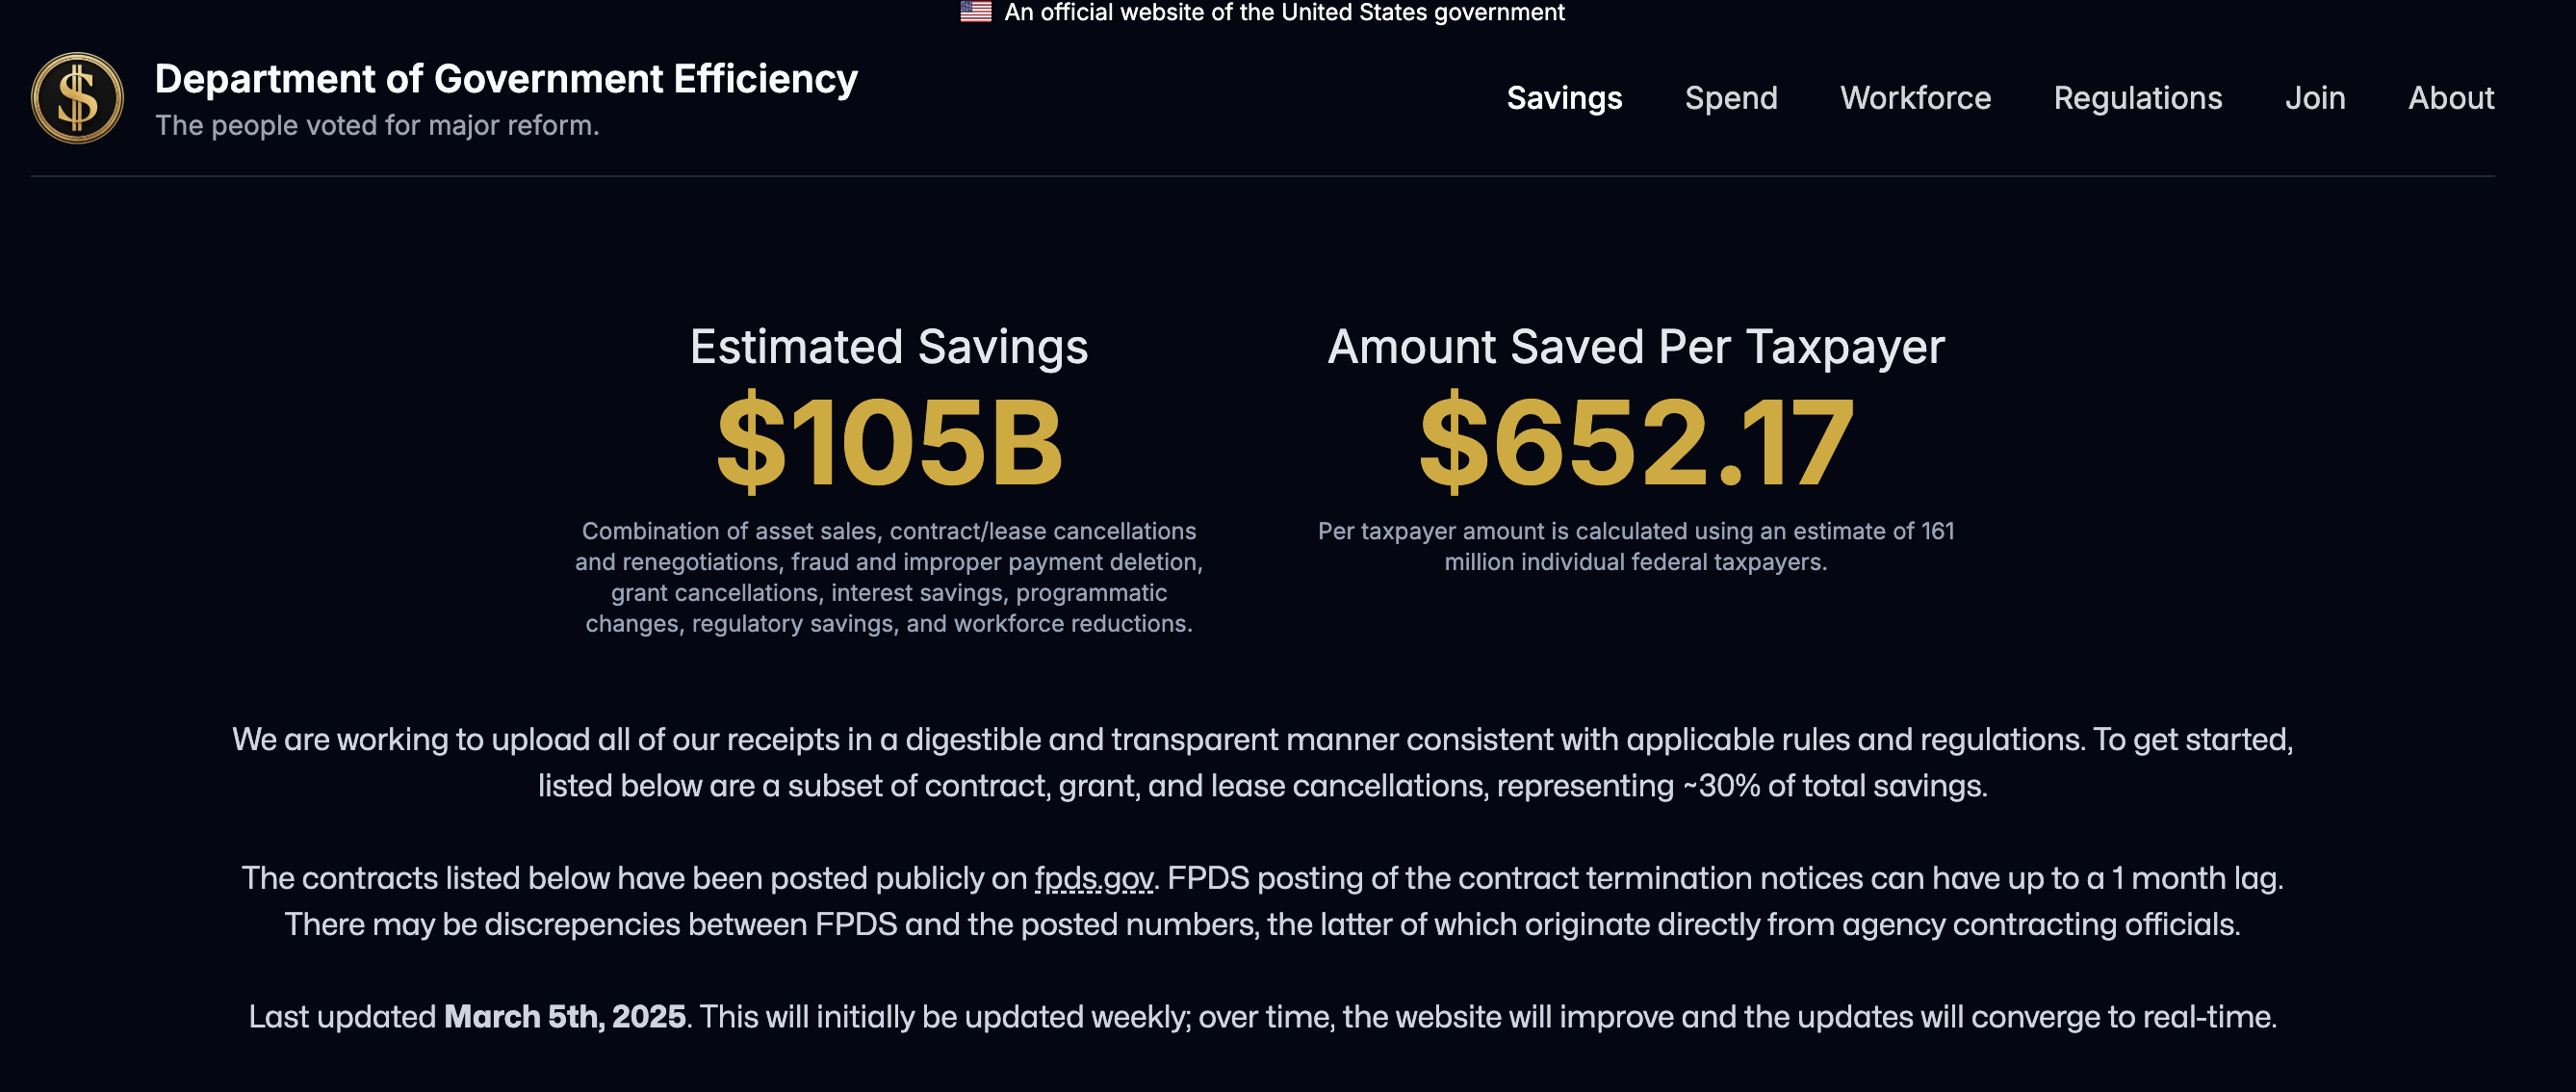

#### **Looking at DOGE data - Ways to access**
1. Selectable text --> copy and paste
2. Scraping 
3. Grab from someone who has already scraped.

Below is a file showing what I scraped on 2/28. We're just going to focus on the contracts posted on the Savings page because it has source links that allow us to check against federal records. 

In [28]:
import pandas as pd
import numpy as np
import humanize

df = pd.read_csv('../data/contracts_20250228.csv')
df.head(3)

,jb_id,agency,uploaded_date,fpds_link,ceiling_value,description,value,piid
0,1,BUREAU OF LAND MANAGEMENT,2025-02-13,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,440000.00,EEO DEIA SUPPORT,145000.0,93310023P0021
1,2,COMMITTEE FOR PURCHASE FROM PEOPLE WHO ARE BLI...,2025-02-20,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,199305.00,Legal Database that allows lawyers to conduct ...,21341.0,95044124P0006
2,3,COMMODITY FUTURES TRADING COMMISSION,2025-02-11,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,21382.14,RENEW WEST PRINT SUBSCRIPTIONS FOR VARIOUS LEG...,0.0,9523ZY19F0048


#### **How to read the DOGE Savings page**

Columns/Terminology:
* `ceiling_value` - DOGE so far is pulling total contract value here, or the base contract + all options available. This is the maximum amount a contract can legally reach, but not the value the government has committed to spending.
* `value` - In DOGE's previous API, the `value` column represented their calculations for savings. I've retained that naming system here. Savings is generally calucated by DOGE as `ceiling_value` minus total obligations. Essentially it's a claim that by canceling the contract, the government is "saving" the difference between obligations and the maximum amount the contract could reach.
    * Actual savings in the event of a canceled contract could be found by subtracting _outlays_ from total obligations. This difference represents actual expected spending the government has reclaimed.
* `FPDS` - [Federal Procurement Data System](https://www.fpds.gov/fpdsng_cms/index.php/en/), federal contract database monitored by the Federal Procurement Data Center. FPDS feeds into USA Spending's contract database once a day.
* `uploaded_date` - There is no data dictionary for DOGE's Savings page, so we can't be certain here, but I assume this means the date the contract was uploaded on the DOGE savings page.

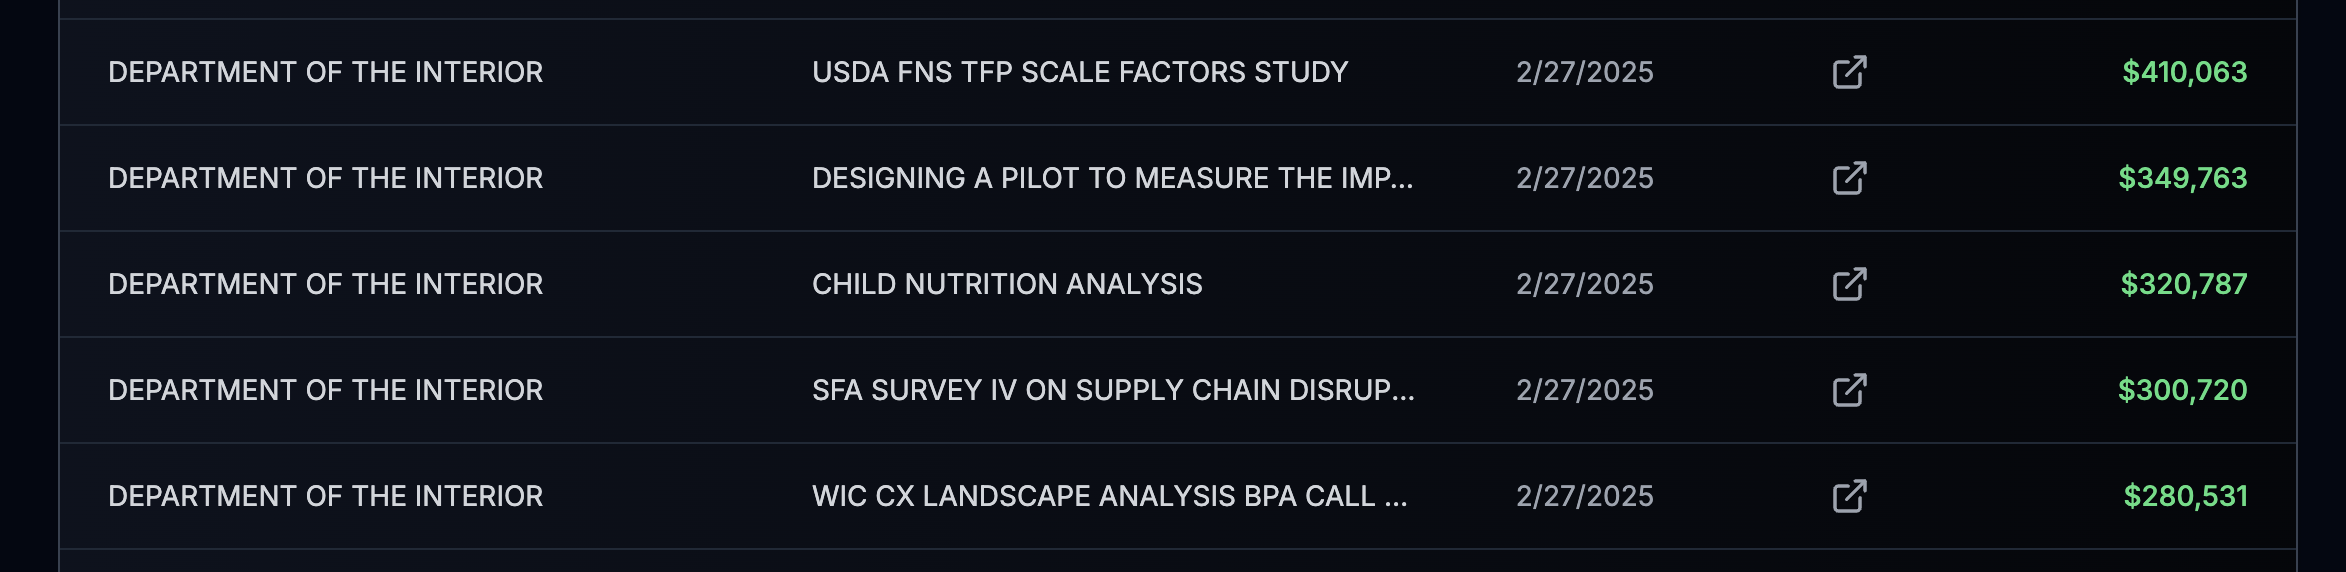

Repeat terms from above:
* Obligations/total obligated amount/total action obligation
* Outlays
* PIID

In [31]:
#What's the total ceiling value of these contracts?
humanize.intword(df.ceiling_value.sum())

'16.8 billion'

In [32]:
#What's the total purported savings
humanize.intword(df.value.sum())

'9.3 billion'

<Axes: title={'center': '10 top agencies with highest DOGE claimed savings, as of Feb. 28, 2025'}, ylabel='agency'>

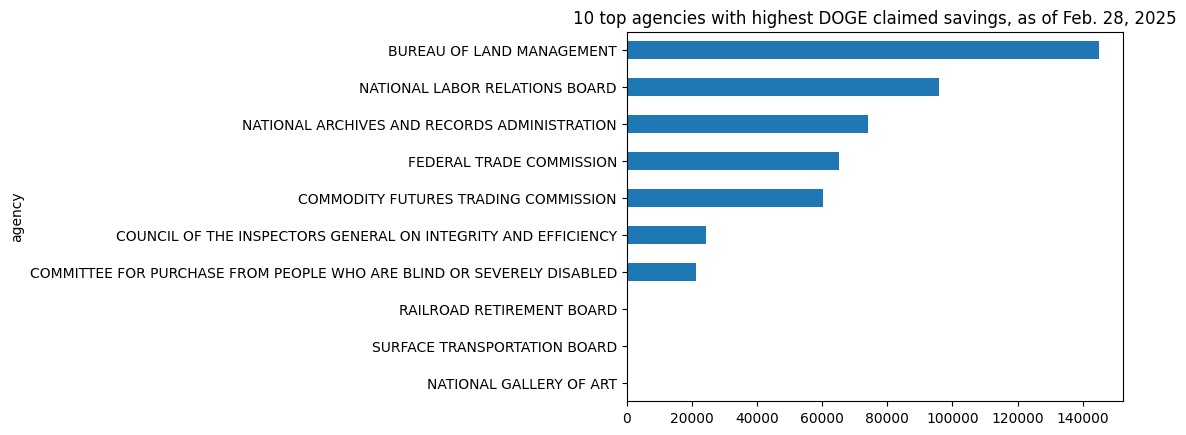

In [42]:
#Purported savings by agency? 
df.groupby('agency').value.sum().sort_values().head(10)\
.plot(kind='barh', title='10 top agencies with highest DOGE claimed savings, as of Feb. 28, 2025')

#### How to check data/find inconsistencies

Initial/immediate checks:
* Check daily for updates (last update date posted on site is not always accurate--we've found changes in the data even though no update was posted)
* Sort for highest savings and ceiling values. Look at actual FPDS links for these.
* Check for contracts that post \\$0 in savings (let's talk about this!)
* Check for duplicates across `description`, `celing_value`, `value` and `agency`  

In [50]:
#Highest ceiling values
pd.set_option('display.max_colwidth',200)
df.sort_values('ceiling_value',ascending=False).head(5)[['agency','fpds_link','ceiling_value','value','piid']]

,agency,fpds_link,ceiling_value,value,piid
1531,DEPARTMENT OF TREASURY,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=2050&PIID=2032H524A00020&modNumber=P00001&idvAgencyID=&idvPIID=47QRAA18D00C6&contractType=IDV,1.900000e+09,1.900000e+09,2032H524A00020
2292,USAID,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA21C00056&modNumber=P00030&idvAgencyID=&idvPIID=&contractType=AWARD,5.207579e+08,1.595036e+08,7200AA21C00056
2287,USAID,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA22C00044&modNumber=P00012&idvAgencyID=&idvPIID=&contractType=AWARD,2.513472e+08,8.019833e+07,7200AA22C00044
2274,USAID,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA19C00080&modNumber=P00019&idvAgencyID=&idvPIID=&contractType=AWARD,2.500000e+08,5.350415e+07,7200AA19C00080
2293,USAID,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA23C00131&modNumber=P00007&idvAgencyID=&idvPIID=&contractType=AWARD,2.000000e+08,1.614903e+08,7200AA23C00131


In [51]:
#Highest "savings" values
df.sort_values('value',ascending=False).head(5)[['agency','fpds_link','ceiling_value','value','piid']]

,agency,fpds_link,ceiling_value,value,piid
1531,DEPARTMENT OF TREASURY,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=2050&PIID=2032H524A00020&modNumber=P00001&idvAgencyID=&idvPIID=47QRAA18D00C6&contractType=IDV,1.900000e+09,1.900000e+09,2032H524A00020
2293,USAID,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA23C00131&modNumber=P00007&idvAgencyID=&idvPIID=&contractType=AWARD,2.000000e+08,1.614903e+08,7200AA23C00131
2292,USAID,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA21C00056&modNumber=P00030&idvAgencyID=&idvPIID=&contractType=AWARD,5.207579e+08,1.595036e+08,7200AA21C00056
923,DEPARTMENT OF HEALTH AND HUMAN SERVICES,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7529&PIID=75N95024F00001&modNumber=P00001&idvAgencyID=&idvPIID=75N95024D00018&contractType=AWARD,1.500000e+08,1.494373e+08,75N95024F00001
2291,USAID,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA24N00009&modNumber=P00001&idvAgencyID=&idvPIID=47QRAD20DU148&contractType=AWARD,1.499920e+08,1.429845e+08,7200AA24N00009


In [69]:
# How man contracts claim $0 in savings? --> 791 as of 2/28
print(f'{len(df[df.value == 0])} contracts have $0 in savings listed')
print(f'That comes to {round(((len(df[df.value == 0])/len(df))*100),2)} percent of contracts posted on the Savings page')

791 contracts have $0 in savings listed
That comes to 34.44 percent of contracts posted on the Savings page


In [75]:
#DUPES - not a gauranteed duplicate contract, but gives you a group to foucs on  
len(df[(df.duplicated(['description','ceiling_value','value','agency'], keep=False)) &
      (df.piid.notna())])

57

In [85]:
# What can we learn from descriptions?
    # Human resources
    # equity
    # What other words would you like to search for?? 
df[df.description.str.contains('equity',case=False,na=False)][['agency','ceiling_value','value','description']]

,agency,ceiling_value,value,description
416,DEPARTMENT OF AGRICULTURE,414892.63,121770.76,"DIVERSITY, EQUITY, INCLUSION, AND ACCESSIBILITY TRAINING"
420,DEPARTMENT OF AGRICULTURE,25000000.00,25000000.00,"DIVERSITY, EQUITY, INCLUSION AND ACCESSIBILITY (DEIA) ASSESSMENT AND TRAINING SERVICES"
422,DEPARTMENT OF AGRICULTURE,11785.81,0.00,WEPO EQUITY/ENVIRONMENTAL JUSTICE ASSESSMENTS AND SPEAKER SERIES.SPEAKER SERIES PRESENTATIONS NEEDED FOR EQUITY BRIDGE BUILDER PROGRAMMING - METROPOLITAN GROUP CURRENT BPA CONTRACT 12344V19A 0003 ...
424,DEPARTMENT OF AGRICULTURE,31940.82,0.00,LAC GENDER EQUITY FACILITATORSERVICES FOR FOREST SERVICE IP
425,DEPARTMENT OF AGRICULTURE,54306.23,0.00,AUDIO VISUAL EQUIPMENT AND SERVICES FOR THE CHIEF'S EQUITY SUMMIT
...,...,...,...,...
2058,USAID,1018354.00,834889.00,"DIVERSITY, EQUITY, AND INCLUSION (DEI) SPECIALIST, HBMO"
2066,USAID,56575516.00,32148908.28,"GENDER EQUALITY AND WOMEN EMPOWERMENT HUB; ADVANCE GENDER EQUITY, EQUALITY AND EMPOWERMEN"
2108,USAID,26800.00,0.00,"To organize two events to support the USAID/Mexico Integration Strategy, seeking to improve and enhance the appreciation of diversity; to advocate for a culture of inclusion, belonging, and equity..."
2113,USAID,20000.00,0.00,"To procure one local firm to conduct a DEIA (Diversity, Equity, Inclusion, and Accessibility) internal assessment, and provide DEIA Strategic Services and Development"


### STEP 3: Connecting DOGE data with FPDS data linked

* [FPDS](https://www.fpds.gov/fpdsng_cms/index.php/en/) = Federal Procurement Data System
* FPDS feeds USA Spending's contract information
* Using DOGE's links, we can learn TONS of additional information on each contract posted. We can also take a look at things that don't seem to line up, including:
1. Expired contracts
2. Mismatched contracts
3. Potentially bad math
4. Gut check with USA Spending as well (same information--different interface and different change log)

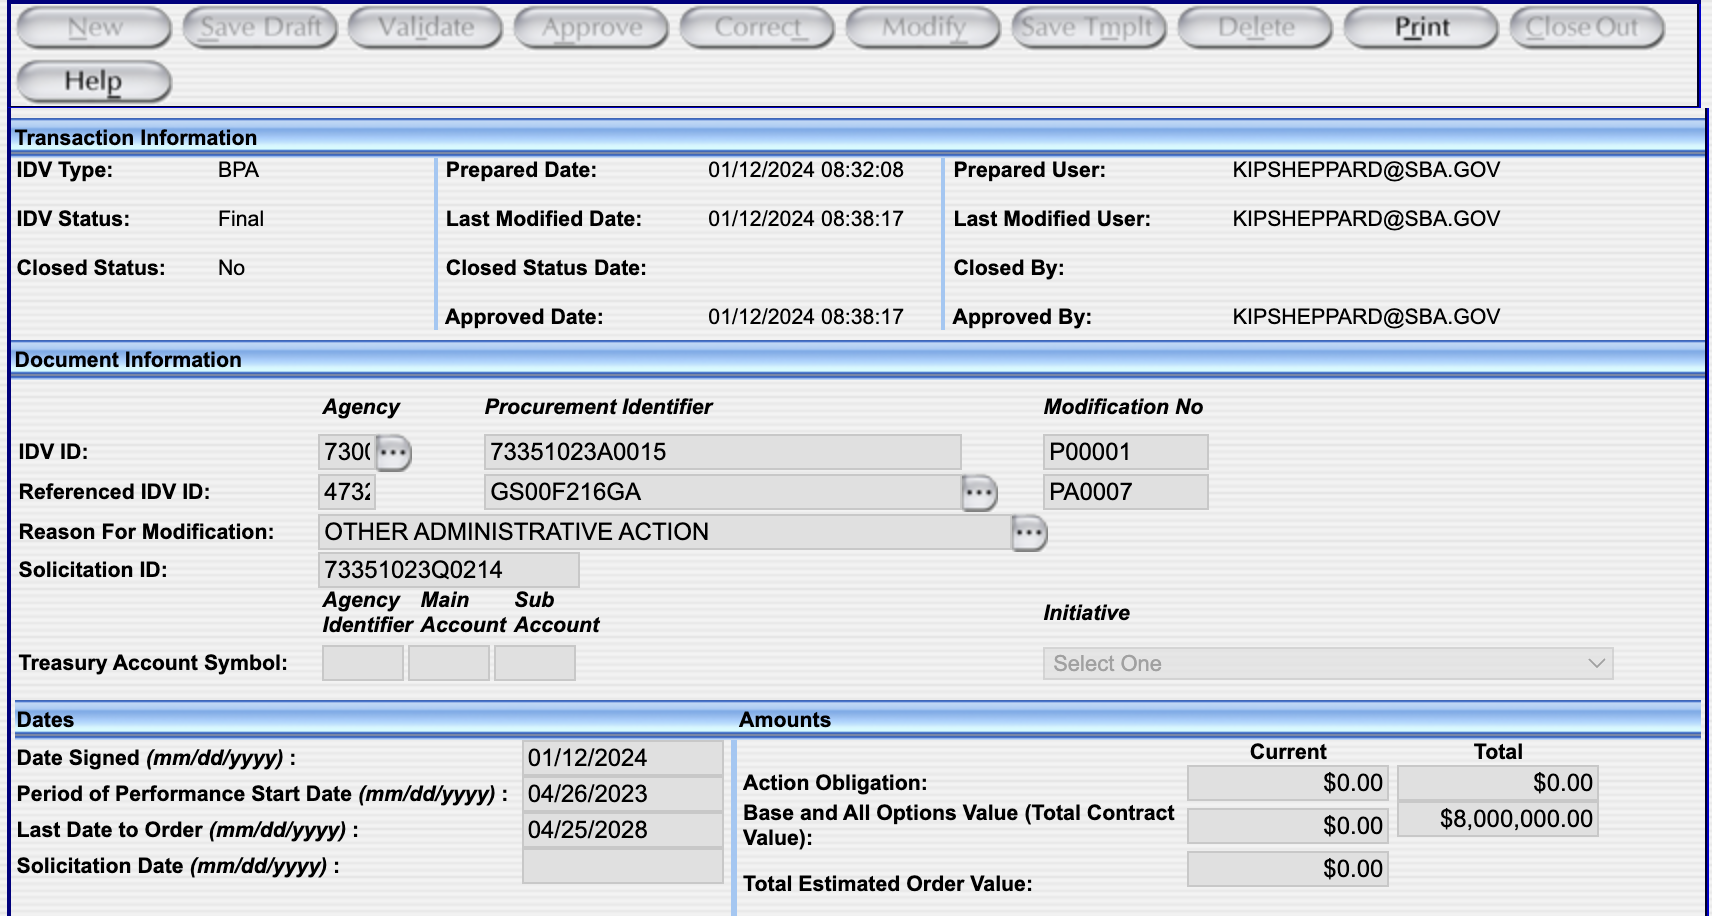

In [95]:
# grab a piid
#look at usa spending
# look at same FPDS page
# 
fpds = pd.read_csv('../data/merged_20250224.csv')
fpds.head(2)

,date,piid,agency,ceiling_value,value,update_date,fpds_status,fpds_link,vendor,description,recip_cd,pl_perform_cd,idv_piid,action_obligation_total,base_exercised_options,total_contract_val,vendor_fpds,date_signed,period_performance_start_date,completion_date,est_ultimate_completion_date
0,2025-01-31,12639525Q0046 (Notice of Intent ID),Department of Agriculture,NaN,NaN,1/31/2025,SOLICITATION,Solicitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-27,47QFEA24K0008,Office of Personnel Management,NaN,NaN,2/13/2025,SOLICITATION,Solicitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
#let's take a look at dates first. Does FPDS say any of these contracts have expired?
print(fpds[fpds.est_ultimate_completion_date < '2025/01/20'].shape)
fpds[fpds.est_ultimate_completion_date < '2025/01/20'][['ceiling_value','value']].sum()

(581, 21)


ceiling_value    2.298386e+09
value            8.086759e+08
dtype: float64

In [147]:
#what about mismatched vendors? let's clean up vendor names a bit first 

fpds['vendor_modified'] = fpds['vendor'].str.replace(',','')\
    .str.replace('.','').str.replace('THE','')\
    .str.replace(' - ','-')\
    .str.replace('&','AND').replace({None: np.nan}).str.strip()
fpds['vendor_fpds_modified'] = fpds['vendor_fpds'].str.replace(',','').str.replace('.','')\
    .str.replace(' - ','-')\
    .str.replace('THE','').str.replace('&','AND').str.strip().replace({np.nan: np.nan})

fpds['vendor_2wds']  = fpds.vendor_modified.str.extract(r'^([\w-]+(?:\s[\w-]+)?)')
fpds['vendor_fpds_2wd']  = fpds.vendor_fpds_modified.str.extract(r'^([\w-]+(?:\s[\w-]+)?)')

#After cleaning up our columns, how often do the first two words of each vendor name NOT match
fpds[(fpds.vendor.notna()) & 
     (fpds.vendor_fpds.notna()) & 
     (fpds.vendor_2wds != fpds.vendor_fpds_2wd)][['vendor',
                                                      'vendor_fpds',
                                                      'vendor_2wds',
                                                      'vendor_fpds_2wd','fpds_link']].head(15)

,vendor,vendor_fpds,vendor_2wds,vendor_fpds_2wd,fpds_link
43,INCENTIVE AMERICA INC,"INCENTIVEAMERICA, INC.",INCENTIVE AMERICA,INCENTIVEAMERICA INC,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=12C2&PIID=12318723F0647&modNumber=P00001&idvAgencyID=&idvPIID=12318719A0002&contractType=AWARD
116,LYNKER CORPORATION,LYNKER TECHNOLOGIES LLC,LYNKER CORPORATION,LYNKER TECHNOLOGIES,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=1330&PIID=1305M220FNCNA0300&modNumber=P23011&idvAgencyID=&idvPIID=1305M419DNCNA0018&contractType=AWARD
133,LYNKER CORPORATION,LYNKER TECHNOLOGIES LLC,LYNKER CORPORATION,LYNKER TECHNOLOGIES,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=1330&PIID=1305M324F0185&modNumber=0&idvAgencyID=&idvPIID=1305M419DNCNA0018&contractType=AWARD
153,STEMISED INC,"HOPPE, KATHY",STEMISED INC,HOPPE KATHY,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=1344&PIID=1333BJ20P00222002&modNumber=P25011&idvAgencyID=&idvPIID=&contractType=AWARD
253,"BLOOMBERG INDUSTRY GROUP, INC.","BUREAU OF NATIONAL AFFAIRS, INC., THE",BLOOMBERG INDUSTRY,BUREAU OF,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=2001&PIID=2032H322C00003&modNumber=P00010&idvAgencyID=&idvPIID=&contractType=AWARD
286,"BLOOMBERG INDUSTRY GROUP, INC.","BUREAU OF NATIONAL AFFAIRS, INC., THE",BLOOMBERG INDUSTRY,BUREAU OF,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=2046&PIID=2031JW21P00009&modNumber=P00007&idvAgencyID=&idvPIID=&contractType=AWARD
331,"BLOOMBERG INDUSTRY GROUP, INC.",BUREAU OF NATIONAL AFFAIRS INC,BLOOMBERG INDUSTRY,BUREAU OF,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=4732&PIID=47QPCA22P0006&modNumber=0&idvAgencyID=&idvPIID=&contractType=AWARD
438,"SYNOVIX, INC.",WHITESPACE INNOVATIONS INC,SYNOVIX INC,WHITESPACE INNOVATIONS,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=6925&PIID=693JJ324F00436N&modNumber=0&idvAgencyID=&idvPIID=47QREB19D0025&contractType=AWARD
449,FEDERAL INTEGRATED SYSTEMS CORPORATION,FEDERAL INTERGRATED SYSTEMS CORP,FEDERAL INTEGRATED,FEDERAL INTERGRATED,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=6953&PIID=693JJ421F000015&modNumber=P00004&idvAgencyID=&idvPIID=693JJ418A000001&contractType=AWARD
591,"STRYKER SALES, LLC",STRYKER CORPORATION,STRYKER SALES,STRYKER CORPORATION,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA24M00008&modNumber=0&idvAgencyID=&idvPIID=36F79721D0021&contractType=AWARD


In [130]:
#any repeated links? A couple!
fpds.fpds_link.value_counts().head()

fpds_link
Solicitation                                                                                                                                                             2
https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7529&PIID=75N98025F00004&modNumber=P00001&idvAgencyID=&idvPIID=75N98019D00042&contractType=AWARD       2
https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7529&PIID=75N93024F00001&modNumber=P00003&idvAgencyID=&idvPIID=75N98023D00018&contractType=AWARD       2
https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7529&PIID=75N93022F00001&modNumber=P00005&idvAgencyID=&idvPIID=HHSN272201700039I&contractType=AWARD    2
https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7529&PIID=75N98025F00003&modNumber=P00001&idvAgencyID=&idvPIID=75N98019D00042&contractType=AWARD       2
Name: count, dtype: int64

In [116]:
#now let's check the math - does total contract value align? 
print(fpds.ceiling_value.sum())
print(fpds.total_contract_val.sum())

12673048099.0
12005569401.619999


In [117]:
#okay what about savings? assuming no new updates in fpds since doge last pulled information
print(fpds.value.sum())
print(fpds.total_contract_val.sum() - fpds.action_obligation_total.sum())

7187588305.0
6394163363.369999


In [121]:
#you can go contract by contract and compare these 
fpds['savings_test'] = fpds['total_contract_val'] - fpds['action_obligation_total']

#number of rows where savings do not match, based on DOGE's math
fpds[fpds.savings_test.round(0) == fpds.value.round(0)].shape #685


In [134]:
251_347_177.00-171_148_847.55
114_894_279.0-80198329.44999999
1_800_000.00+34695949.55000001

36495949.55000001

In [124]:
#To what extent is savings off by? 
    # We can subtract our replication of their savings from their own value or vice versa
    # And sort by that output for individual inspection
fpds['diff_savings'] = fpds['savings_test'] - fpds['value']
fpds['diff_savings'] = abs(fpds['diff_savings'])
print(len(fpds[fpds['diff_savings'] < 2])) #785
fpds[fpds['diff_savings'] > 2].sort_values("diff_savings",ascending=False)[['piid','vendor','agency','value',
                                                                        'savings_test','diff_savings',
                                                                        'ceiling_value','total_contract_val',
                                                                        'action_obligation_total',
                                                                       'fpds_link']].head()

785


,piid,vendor,agency,value,savings_test,diff_savings,ceiling_value,total_contract_val,action_obligation_total,fpds_link
525,7200AA22C00044,"CHEMONICS INTERNATIONAL, INC.",US Agency for International Development,114894279.0,80198329.45,34695949.55,249547177.0,251347177.0,1.711488e+08,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA22C00044&modNumber=P00012&idvAgencyID=&idvPIID=&contractType=AWARD
709,72067424C00002,"TETRA TECH ES, INC.",US Agency for International Development,67858286.0,52733286.00,15125000.00,73048710.0,73048710.0,2.031542e+07,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=72067424C00002&modNumber=P00001&idvAgencyID=&idvPIID=&contractType=AWARD
707,72067423C00003,RESEARCH TRIANGLE INSTITUTE,US Agency for International Development,52736874.0,41267577.00,11469297.00,88993687.0,88993687.0,4.772611e+07,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=72067423C00003&modNumber=P00004&idvAgencyID=&idvPIID=&contractType=AWARD
631,72026321C00003,"MTC INTERNATIONAL DEVELOPMENT HOLDING COMPANY, LLC",US Agency for International Development,19358346.0,9359968.00,9998378.00,69892703.0,69892703.0,6.053274e+07,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=72026321C00003&modNumber=P00010&idvAgencyID=&idvPIID=&contractType=AWARD
637,72029424C00001,"CHEMONICS INTERNATIONAL, INC.",US Agency for International Development,37239309.0,28564309.00,8675000.00,44239309.0,44239309.0,1.567500e+07,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=72029424C00001&modNumber=P00001&idvAgencyID=&idvPIID=&contractType=AWARD


In [131]:
#Let's look at an example where the math works
fpds[fpds.value==fpds.savings_test].sort_values('value',ascending=False).head()

,date,piid,agency,ceiling_value,value,update_date,fpds_status,fpds_link,vendor,description,recip_cd,pl_perform_cd,idv_piid,action_obligation_total,base_exercised_options,total_contract_val,vendor_fpds,date_signed,period_performance_start_date,completion_date,est_ultimate_completion_date,vendor_modified,vendor_fpds_modified,vendor_2wds,vendor_fpds_2wd,savings_test,diff_savings
507,2025-02-06,7200AA20D00014,US Agency for International Development,655000000.0,654990000.0,2/12/2025,OTHER ADMINISTRATIVE ACTION,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA20D00014&modNumber=P00004&idvAgencyID=&idvPIID=&contractType=IDV,"INTERNATIONAL DEVELOPMENT GROUP ADVISORY SERVICES, LLC",PPL/LER NEW IDIQS,VIRGINIA 08,NaN,NaN,10000.0,0.0,655000000.0,"INTERNATIONAL DEVELOPMENT GROUP ADVISORY SERVICES, LLC",10/28/2024,2020-07-30,NaN,NaN,INTERNATIONAL DEVELOPMENT GROUP ADVISORY SERVICES LLC,INTERNATIONAL DEVELOPMENT GROUP ADVISORY SERVICES LLC,INTERNATIONAL DEVELOPMENT,INTERNATIONAL DEVELOPMENT,654990000.0,0.0
518,2025-02-11,7200AA21F00009,US Agency for International Development,157795259.0,132770259.0,2/12/2025,FUNDING ONLY ACTION,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA21F00009&modNumber=P00003&idvAgencyID=&idvPIID=7200AA19D00015&contractType=AWARD,"CHEMONICS INTERNATIONAL, INC.",SWIFT-5 OTI LIBYA INITIAL FUNDING,DISTRICT OF COLUMBIA 98,NaN,7200AA19D00015,25025000.0,157795259.0,157795259.0,"CHEMONICS INTERNATIONAL, INC.",09/20/2022,2021-09-03,2026-09-05,2026-09-05,CHEMONICS INTERNATIONAL INC,CHEMONICS INTERNATIONAL INC,CHEMONICS INTERNATIONAL,CHEMONICS INTERNATIONAL,132770259.0,0.0
426,2025-02-06,693JJ322A000004,Department of Transportation,94000000.0,94000000.0,2/6/2025,SUPPLEMENTAL AGREEMENT FOR WORK WITHIN SCOPE,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=6925&PIID=693JJ322A000004&modNumber=P00004&idvAgencyID=&idvPIID=GS00F010CA&contractType=IDV,"ICF INCORPORATED, L.L.C.","FIRM FIXED PRICE (FFP)/ TIME AND MATERIALS (T&M) BLANKET PURCHASE AGREEMENT IS ESTABLISHED BETWEEN THE FEDERAL HIGHWAY ADMINISTRATION (FHWA) AND ICF INCORPORATED, LLC. THIS BPA WILL PROVIDE FUND...",VIRGINIA 11,NaN,GS00F010CA,0.0,0.0,94000000.0,"ICF INCORPORATED, L.L.C.",01/13/2025,2022-03-28,NaN,NaN,ICF INCORPORATED LLC,ICF INCORPORATED LLC,ICF INCORPORATED,ICF INCORPORATED,94000000.0,0.0
636,2025-02-12,72026821C00001,US Agency for International Development,115874054.0,73214054.0,2/12/2025,OTHER ADMINISTRATIVE ACTION,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=72026821C00001&modNumber=P00007&idvAgencyID=&idvPIID=&contractType=AWARD,DAI GLOBAL LLC,"THIS IS A NEW CONTRACT TO IMPLEMENT A NEW ACTIVITY: ""THE WATER SANITATION AND CONSERVATION' (WSC) ACTIVITY.",MARYLAND 08,NaN,NaN,42660000.0,44610152.0,115874054.0,"DAI GLOBAL, LLC",07/22/2024,2021-06-17,2027-07-29,2027-07-29,DAI GLOBAL LLC,DAI GLOBAL LLC,DAI GLOBAL,DAI GLOBAL,73214054.0,0.0
581,2025-02-11,7200AA24C00062,US Agency for International Development,79913609.0,64496011.0,2/12/2025,OTHER ADMINISTRATIVE ACTION,https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=7200AA24C00062&modNumber=P00002&idvAgencyID=&idvPIID=&contractType=AWARD,DAI GLOBAL LLC,THE ACCELERATE ACTIVITY AIMS TO ADVANCE EUROPEAN UNION (EU) MARKET INTEGRATION AND ACCESSION FOR COUNTRIES IN THE E&E REGION.,MARYLAND 08,MARYLAND 08,NaN,15417598.0,43659611.0,79913609.0,DAI GLOBAL LLC,01/21/2025,2024-08-23,2029-08-25,2029-08-25,DAI GLOBAL LLC,DAI GLOBAL LLC,DAI GLOBAL,DAI GLOBAL,64496011.0,0.0


### Examples:
1. `72026821C00001` - [When the math aligns](https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7200&PIID=72026821C00001&modNumber=P00007&idvAgencyID=&idvPIID=&contractType=AWARD)
2. `7200AA22C00044` - [When the math does not align](https://www.fpds.gov/common/jsp/LaunchWebPage.jsp?command=execute&requestid=243194283&version=1.5) | [USA Spending link](https://www.usaspending.gov/award/CONT_AWD_7200AA22C00044_7200_-NONE-_-NONE-) , You can see that the DOGE data does not take into account the most recent transaction.
3. `70FA4022F00000369` - [Cancelation relates to removing DEI-related lanaguge only](https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7022&PIID=70FA4022F00000369&modNumber=P00004&idvAgencyID=&idvPIID=70FA4022A00000009&contractType=AWARD) | [USA Spending link](https://www.usaspending.gov/award/CONT_AWD_70FA4022F00000369_7022_70FA4022A00000009_7022)
4. `47QPCA22P0006` - [Expired contract](https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=4732&PIID=47QPCA22P0006&modNumber=0&idvAgencyID=&idvPIID=&contractType=AWARD) | [USA Spending link](https://www.usaspending.gov/search/?hash=17e17ca00c5f007e26071f07b9d3b57f)
5. `75D30124F00003` - [Contract recipient listed by DOGE](https://www.usaspending.gov/award/CONT_AWD_75D30124F00003_7523_75D30122D13550_7523) vs [Contract linked by DOGE](https://www.fpds.gov/common/jsp/LaunchWebPage.jsp?command=execute&requestid=243198368&version=1.5)